#Discription:
--The BigMart  dataset consist of two dataset train and test dataset.where we have to pridict the Item_Outlet_Sales. from the test
--Data set.we have to do preprocessing on both the dataset model building is done on only train data set and we have to pridict 
#the accuacu on test dataset.

--This is basically a reggression model building.it has the countinious target.

In [3]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split


#Model building lib 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the train and test data set
train = pd.read_csv("bigdatamart_Train.csv")
test = pd.read_csv("bigdatamart_Test.csv")

In [406]:
#Combining both the dataset in to one file for the preprocsing:
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)

In [407]:
#printing shape of train,test and df dataset
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 13)


In [408]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  
0  Supermarket Type1          3735.1380  train  
1  Supermarket Type2           443.4228  train  
2  Supermarket Type1          2097.2700  train  
3      Grocery Store           732.3800  train  
4  Supermarket Type1           994.7052  train

In [383]:
pd.set_option('display.max_rows',None)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [387]:
df.describe()
#discribing the dataset

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
#here we can see that there is less diffrence between mean and midian(50%) so there is less outliers in the data. 

In [388]:
df.isna().sum()
#As we can see there is no null present in the dataframe.

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

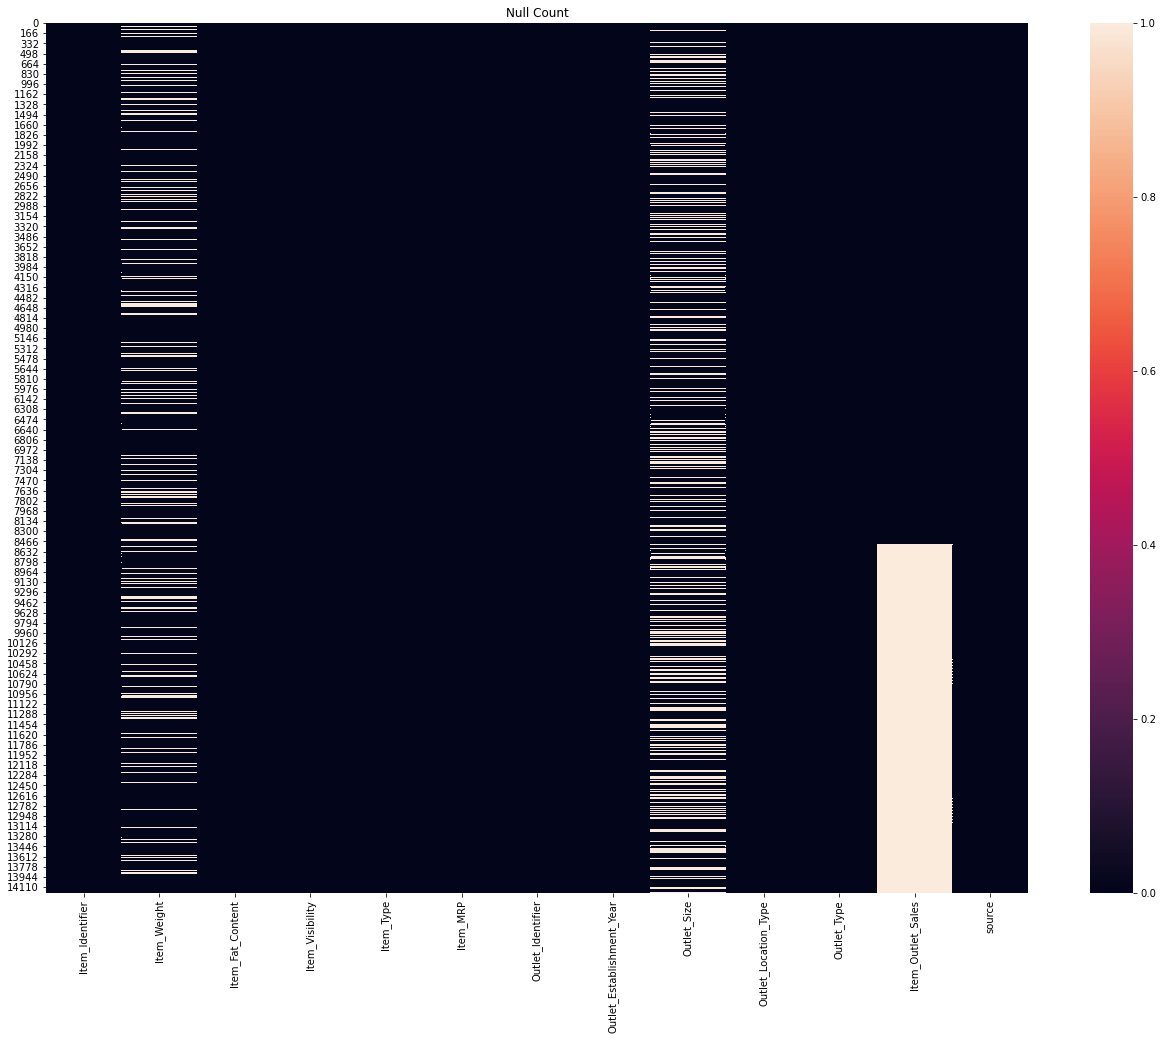

In [389]:
plt.figure(figsize=(22,16))
sns.heatmap(df.isnull())
plt.title('Null Count')
plt.show()

In [335]:
#as we can see that there is null value present in the features.
#Item_Weight 1463
#Outlet_Size 2410
#Item_Outlet_Sales 5681

In [409]:
#replace the countinious data with the mean value of the column
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean())

In [410]:
#checking Outlet_Size value count
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [411]:
##replacing the nan value with the most frquent catagory
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [412]:
#checking Outlet_Size value count
df['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [413]:
df.isna().sum()
#As we can see there is no null present in the dataframe.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [414]:
#checking the value count for the feature
df['Item_Fat_Content'].value_counts()#Outlet_Identifier #Outlet_Size #Outlet_Type

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [415]:
#converting the LF,Low Fat to Low Fat and reg to Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

In [416]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [417]:
df['Item_Identifier'].value_counts()

NCC18    10
FDQ04    10
FDZ10    10
FDQ11    10
FDG33    10
DRD25    10
NCL17    10
FDR19    10
FDB14    10
FDJ57    10
FDH28    10
FDC14    10
FDF16    10
DRI47    10
NCQ42    10
FDD47    10
FDE36    10
FDT37    10
DRK13    10
FDZ20    10
FDC28    10
NCZ30    10
FDV36    10
FDR48    10
FDX09    10
FDO27    10
FDQ45    10
FDT15    10
FDH12    10
NCQ43    10
FDY47    10
FDD08    10
DRL01    10
FDO36    10
FDX43    10
DRH37    10
FDR16    10
FDU57    10
FDA38    10
FDW10    10
NCV06    10
NCM54    10
NCK17    10
NCX06    10
NCC06    10
FDN50    10
FDD16    10
FDT43    10
FDC41    10
FDJ53    10
FDC60    10
FDQ19    10
FDZ44    10
DRI11    10
FDW13    10
FDM44    10
FDR31    10
FDX36    10
FDU52    10
DRE15    10
FDX40    10
FDR14    10
FDA52    10
FDV09    10
FDY36    10
FDG46    10
FDL46    10
FDG40    10
NCB18    10
DRC27    10
FDZ40    10
FDQ03    10
FDB03    10
NCR53    10
NCE06    10
FDS48    10
FDU20    10
FDN56    10
NCJ30    10
FDU40    10
DRD24    10
FDC50    10
FDH21    10
FDP3

In [418]:
#here Item_Identifier columns the we are chagging the type of food with its catagory
#FD=Food 
#NC=NonConsumable
#DR=Drinks
#so we are taking the first two values and converting it to its values

In [419]:
df['Item_Type_New'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_New']=df['Item_Type_New'].map({'FD':'Food','NC':'NonConsumable','DR':'Drinks'})

In [420]:
df['Item_Type_New'].value_counts()

Food             10201
NonConsumable     2686
Drinks            1317
Name: Item_Type_New, dtype: int64

In [421]:
#Using the label encoding:
lb=LabelEncoder()
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_New','Outlet_Type','Outlet_Identifier']

for i in var_mod:
    df[i]=lb.fit_transform(df[i])

In [422]:
df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30                 0         0.016047   
1           DRC01         5.92                 1         0.019278   
2           FDN15        17.50                 0         0.016760   
3           FDX07        19.20                 1         0.000000   
4           NCD19         8.93                 0         0.000000   

               Item_Type  Item_MRP  Outlet_Identifier  \
0                  Dairy  249.8092                  9   
1            Soft Drinks   48.2692                  3   
2                   Meat  141.6180                  9   
3  Fruits and Vegetables  182.0950                  0   
4              Household   53.8614                  1   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            0                     2            1   

   Item_Outlet_Sales source  Item_Type_New  
0          3735.1380  train              1  
1           443.4228  train              0  
2          2097.2700  train              1  
3           732.3800  train              1  
4           994.7052  train              2

In [428]:
#Now performing the get dummies on the encoded data
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_New','Outlet_Type','Outlet_Identifier'])

In [429]:
df.head()

Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0           FDA15         9.30         0.016047                  Dairy   
1           DRC01         5.92         0.019278            Soft Drinks   
2           FDN15        17.50         0.016760                   Meat   
3           FDX07        19.20         0.000000  Fruits and Vegetables   
4           NCD19         8.93         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales source  \
0  249.8092                       1999          3735.1380  train   
1   48.2692                       2009           443.4228  train   
2  141.6180                       1999          2097.2700  train   
3  182.0950                       1998           732.3800  train   
4   53.8614                       1987           994.7052  train   

   Item_Fat_Content_0  Item_Fat_Content_1  ...  Outlet_Identifier_0  \
0                   1                   0  ...                    0   
1                   0                   1  ...                    0   
2                   1                   0  ...                    0   
3                   0                   1  ...                    1   
4                   1                   0  ...                    0   

   Outlet_Identifier_1  Outlet_Identifier_2  Outlet_Identifier_3  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   Outlet_Identifier_4  Outlet_Identifier_5  Outlet_Identifier_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_7  Outlet_Identifier_8  Outlet_Identifier_9  
0                    0                    0                    1  
1                    0                    0                    0  
2                    0                    0                    1  
3                    0                    0                    0  
4                    0                    0                    0  

[5 rows x 33 columns]

In [28]:
#dt_value=['int8','int16','int32','int64','float16','float32','float64']
#cat_data=[]
#feature_type=df.columns.values.tolist()


#for column in feature_type:
#    if df[column].dtype in dt_value:
#        continue
#    cat_data.append(column)        

In [430]:
#Dropping the columns Item_Type and Outlet_Establishment_Year from the datset as it not requried
df=df.drop(columns=['Outlet_Establishment_Year','Item_Type'],axis=1)

In [433]:
df.head()

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0           FDA15         9.30         0.016047  249.8092          3735.1380   
1           DRC01         5.92         0.019278   48.2692           443.4228   
2           FDN15        17.50         0.016760  141.6180          2097.2700   
3           FDX07        19.20         0.000000  182.0950           732.3800   
4           NCD19         8.93         0.000000   53.8614           994.7052   

  source  Item_Fat_Content_0  Item_Fat_Content_1  Outlet_Location_Type_0  \
0  train                   1                   0                       1   
1  train                   0                   1                       0   
2  train                   1                   0                       1   
3  train                   0                   1                       0   
4  train                   1                   0                       0   

   Outlet_Location_Type_1  ...  Outlet_Identifier_0  Outlet_Identifier_1  \
0                       0  ...                    0                    0   
1                       0  ...                    0                    0   
2                       0  ...                    0                    0   
3                       0  ...                    1                    0   
4                       0  ...                    0                    1   

   Outlet_Identifier_2  Outlet_Identifier_3  Outlet_Identifier_4  \
0                    0                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_5  Outlet_Identifier_6  Outlet_Identifier_7  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_8  Outlet_Identifier_9  
0                    0                    1  
1                    0                    0  
2                    0                    1  
3                    0                    0  
4                    0                    0  

[5 rows x 31 columns]

In [434]:
#droping the encoded colums:
df=df.drop(columns=['Item_Identifier'])

In [435]:
df.shape

(14204, 30)

In [436]:
df.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales source  \
0         9.30         0.016047  249.8092          3735.1380  train   
1         5.92         0.019278   48.2692           443.4228  train   
2        17.50         0.016760  141.6180          2097.2700  train   
3        19.20         0.000000  182.0950           732.3800  train   
4         8.93         0.000000   53.8614           994.7052  train   

   Item_Fat_Content_0  Item_Fat_Content_1  Outlet_Location_Type_0  \
0                   1                   0                       1   
1                   0                   1                       0   
2                   1                   0                       1   
3                   0                   1                       0   
4                   1                   0                       0   

   Outlet_Location_Type_1  Outlet_Location_Type_2  ...  Outlet_Identifier_0  \
0                       0                       0  ...                    0   
1                       0                       1  ...                    0   
2                       0                       0  ...                    0   
3                       0                       1  ...                    1   
4                       0                       1  ...                    0   

   Outlet_Identifier_1  Outlet_Identifier_2  Outlet_Identifier_3  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   Outlet_Identifier_4  Outlet_Identifier_5  Outlet_Identifier_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_7  Outlet_Identifier_8  Outlet_Identifier_9  
0                    0                    0                    1  
1                    0                    0                    0  
2                    0                    0                    1  
3                    0                    0                    0  
4                    0                    0                    0  

[5 rows x 30 columns]

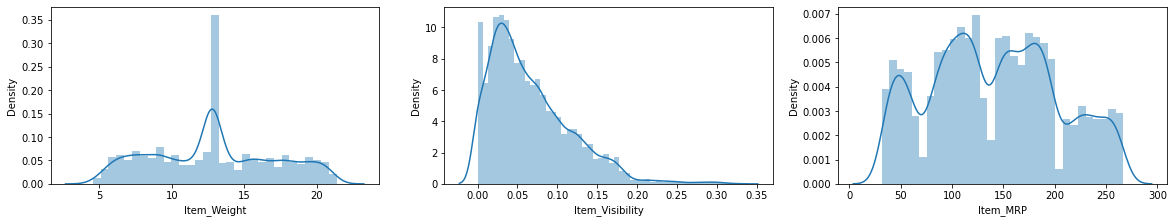

In [437]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.iloc[:,:3]:
    if pltnum <= 30:
        plt.subplot(4,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [ ]:
#here data distribution looks normal.
#we can see outlier on only in one column i.e item_visibility

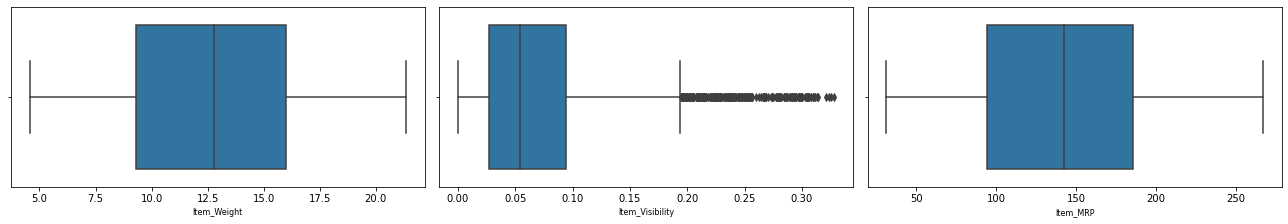

In [439]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,:3]:
    if pltnum <= 16:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [440]:
#using the IQR method to remove outliers
q1=df.iloc[:,[1]].quantile(0.25)

q3=df.iloc[:,[1]].quantile(0.75)

iqr=q3-q1

In [441]:
for column in df.iloc[:,[1]]:
    index=np.where(df[column] > (q3[column] + (1.5 * iqr[column])))

In [442]:
index

(array([   49,    65,    83,   108,   174,   334,   434,   502,   521,
          532,   680,   847,   854,   966,  1159,  1225,  1272,  1291,
         1311,  1324,  1434,  1496,  1501,  1560,  1575,  1644,  1651,
         1754,  1805,  1827,  1841,  1941,  2081,  2088,  2122,  2177,
         2251,  2324,  2336,  2401,  2403,  2439,  2445,  2586,  2613,
         2728,  2855,  2895,  3001,  3017,  3171,  3206,  3336,  3341,
         3399,  3458,  3474,  3488,  3497,  3540,  3750,  3767,  3811,
         3884,  3993,  4006,  4175,  4192,  4219,  4229,  4350,  4382,
         4408,  4530,  4538,  4567,  4656,  4674,  4789,  4941,  4987,
         5031,  5050,  5057,  5083,  5150,  5154,  5287,  5354,  5366,
         5374,  5445,  5461,  5634,  5636,  5732,  5734,  5784,  5795,
         5837,  5880,  5891,  5946,  6008,  6012,  6102,  6179,  6536,
         6547,  6576,  6622,  6647,  6670,  6674,  6786,  6833,  6903,
         6909,  6926,  6953,  6966,  7005,  7030,  7072,  7081,  7088,
      

In [443]:
df=df.drop(df.index[index])

In [444]:
df.shape

(13943, 30)

In [446]:
#Data Loss
loss_percentage=(14204-13943)/14204*100
print(loss_percentage)

1.8375105604055197


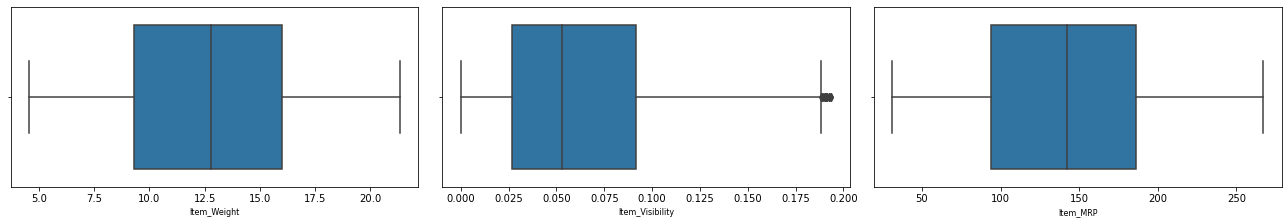

In [448]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,:3]:
    if pltnum <= 16:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [ ]:
#now we can see the outliesr has been reomoved from the features now cheking for the skewness in the features

In [449]:
df_corr=df.iloc[:,:4].abs().corr()
df_corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales    1.000000
Item_MRP             0.449022
Item_Weight          0.007381
Item_Visibility     -0.056559
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
#as the range is between -0.5 t0 +0.5.there is no need to remove the skewness in the data.

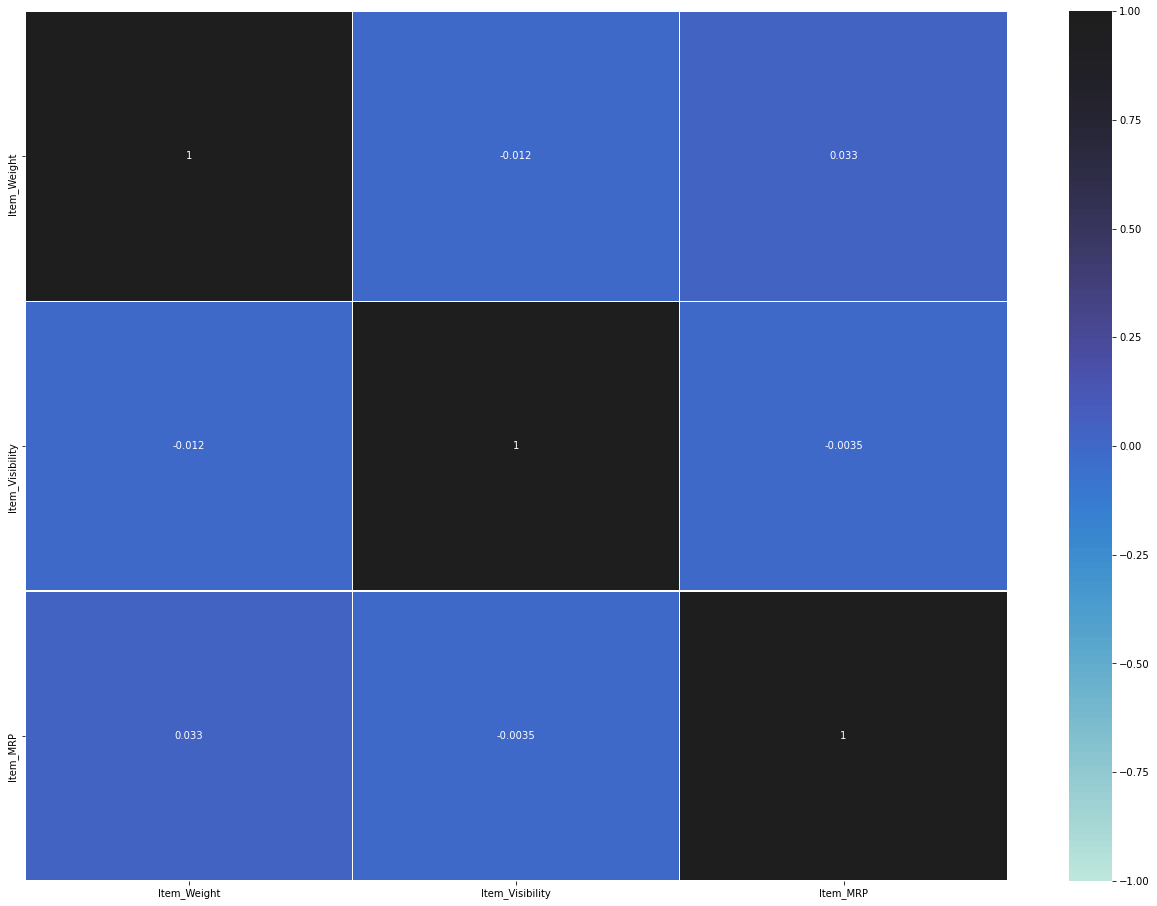

In [450]:
#using the heatmap to check the correlation between features.
corr_matrix=df.iloc[:,:3].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

#as we can see in heatmap there is no correlation between the features and labels

In [ ]:
#as per the heatmap ther is correlation between between features.

In [362]:
#x=df.drop(columns='Item_Outlet_Sales',axis=1)
#y=df['Item_Outlet_Sales']

In [451]:
col_name=['Item_Weight','Item_Visibility','Item_MRP']
features = df[col_name]

In [452]:
scalar=StandardScaler()
x_new=scalar.fit_transform(features.values)

In [453]:
df[['Item_Weight','Item_Visibility','Item_MRP']]=x_new

In [454]:
df.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales source  \
0    -0.822672        -1.023113  1.752119          3735.1380  train   
1    -1.617723        -0.952151 -1.494700           443.4228  train   
2     1.106152        -1.007458  0.009154          2097.2700  train   
3     1.506030        -1.375570  0.661240           732.3800  train   
4    -0.909704        -1.375570 -1.404609           994.7052  train   

   Item_Fat_Content_0  Item_Fat_Content_1  Outlet_Location_Type_0  \
0                   1                   0                       1   
1                   0                   1                       0   
2                   1                   0                       1   
3                   0                   1                       0   
4                   1                   0                       0   

   Outlet_Location_Type_1  Outlet_Location_Type_2  ...  Outlet_Identifier_0  \
0                       0                       0  ...                    0   
1                       0                       1  ...                    0   
2                       0                       0  ...                    0   
3                       0                       1  ...                    1   
4                       0                       1  ...                    0   

   Outlet_Identifier_1  Outlet_Identifier_2  Outlet_Identifier_3  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   Outlet_Identifier_4  Outlet_Identifier_5  Outlet_Identifier_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_7  Outlet_Identifier_8  Outlet_Identifier_9  
0                    0                    0                    1  
1                    0                    0                    0  
2                    0                    0                    1  
3                    0                    0                    0  
4                    0                    0                    0  

[5 rows x 30 columns]

In [455]:
df.shape

(13943, 30)

In [ ]:
#here cleaning, handling missing values, skewness, outliers, standardization is completed for the combine dataset.
#now we will seprate the both train and test dataset to train the model on train dataset.

In [456]:
#Seprating the train dataset:
df1 = df.loc[df['source']=="train"]

In [457]:
#seprating the test dataset:
df2 = df.loc[df['source']=="test"]

In [458]:
df1.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales source  \
0    -0.822672        -1.023113  1.752119          3735.1380  train   
1    -1.617723        -0.952151 -1.494700           443.4228  train   
2     1.106152        -1.007458  0.009154          2097.2700  train   
3     1.506030        -1.375570  0.661240           732.3800  train   
4    -0.909704        -1.375570 -1.404609           994.7052  train   

   Item_Fat_Content_0  Item_Fat_Content_1  Outlet_Location_Type_0  \
0                   1                   0                       1   
1                   0                   1                       0   
2                   1                   0                       1   
3                   0                   1                       0   
4                   1                   0                       0   

   Outlet_Location_Type_1  Outlet_Location_Type_2  ...  Outlet_Identifier_0  \
0                       0                       0  ...                    0   
1                       0                       1  ...                    0   
2                       0                       0  ...                    0   
3                       0                       1  ...                    1   
4                       0                       1  ...                    0   

   Outlet_Identifier_1  Outlet_Identifier_2  Outlet_Identifier_3  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   Outlet_Identifier_4  Outlet_Identifier_5  Outlet_Identifier_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_7  Outlet_Identifier_8  Outlet_Identifier_9  
0                    0                    0                    1  
1                    0                    0                    0  
2                    0                    0                    1  
3                    0                    0                    0  
4                    0                    0                    0  

[5 rows x 30 columns]

In [459]:
#Dropping the column source form the train dataset:
df1=df1.drop(columns='source',axis=1)
df1.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0    -0.822672        -1.023113  1.752119          3735.1380   
1    -1.617723        -0.952151 -1.494700           443.4228   
2     1.106152        -1.007458  0.009154          2097.2700   
3     1.506030        -1.375570  0.661240           732.3800   
4    -0.909704        -1.375570 -1.404609           994.7052   

   Item_Fat_Content_0  Item_Fat_Content_1  Outlet_Location_Type_0  \
0                   1                   0                       1   
1                   0                   1                       0   
2                   1                   0                       1   
3                   0                   1                       0   
4                   1                   0                       0   

   Outlet_Location_Type_1  Outlet_Location_Type_2  Outlet_Size_0  ...  \
0                       0                       0              0  ...   
1                       0                       1              0  ...   
2                       0                       0              0  ...   
3                       0                       1              0  ...   
4                       0                       1              1  ...   

   Outlet_Identifier_0  Outlet_Identifier_1  Outlet_Identifier_2  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    1                    0                    0   
4                    0                    1                    0   

   Outlet_Identifier_3  Outlet_Identifier_4  Outlet_Identifier_5  \
0                    0                    0                    0   
1                    1                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_6  Outlet_Identifier_7  Outlet_Identifier_8  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_9  
0                    1  
1                    0  
2                    1  
3                    0  
4                    0  

[5 rows x 29 columns]

In [460]:
df2.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales source  \
8523     1.870625        -1.209419 -0.534654        2181.288914   test   
8524    -1.057894        -0.531559 -0.865593        2181.288914   test   
8525     0.424007         0.811455  1.622346        2181.288914   test   
8526    -1.289588        -1.037585  0.225286        2181.288914   test   
8527    -0.001074         1.229300  1.501138        2181.288914   test   

      Item_Fat_Content_0  Item_Fat_Content_1  Outlet_Location_Type_0  \
8523                   1                   0                       1   
8524                   0                   1                       0   
8525                   1                   0                       0   
8526                   1                   0                       0   
8527                   0                   1                       0   

      Outlet_Location_Type_1  Outlet_Location_Type_2  ...  \
8523                       0                       0  ...   
8524                       1                       0  ...   
8525                       0                       1  ...   
8526                       1                       0  ...   
8527                       0                       1  ...   

      Outlet_Identifier_0  Outlet_Identifier_1  Outlet_Identifier_2  \
8523                    0                    0                    0   
8524                    0                    0                    1   
8525                    1                    0                    0   
8526                    0                    0                    1   
8527                    0                    0                    0   

      Outlet_Identifier_3  Outlet_Identifier_4  Outlet_Identifier_5  \
8523                    0                    0                    0   
8524                    0                    0                    0   
8525                    0                    0                    0   
8526                    0                    0                    0   
8527                    0                    0                    1   

      Outlet_Identifier_6  Outlet_Identifier_7  Outlet_Identifier_8  \
8523                    0                    0                    0   
8524                    0                    0                    0   
8525                    0                    0                    0   
8526                    0                    0                    0   
8527                    0                    0                    0   

      Outlet_Identifier_9  
8523                    1  
8524                    0  
8525                    0  
8526                    0  
8527                    0  

[5 rows x 30 columns]

In [ ]:
#Dropping the column source form the test dataset:
df1=df1.drop(columns='source',axis=1)
df1.head()

In [461]:
#Dropping the column source form the test dataset:
df2=df2.drop(columns='source',axis=1)
df2.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
8523     1.870625        -1.209419 -0.534654        2181.288914   
8524    -1.057894        -0.531559 -0.865593        2181.288914   
8525     0.424007         0.811455  1.622346        2181.288914   
8526    -1.289588        -1.037585  0.225286        2181.288914   
8527    -0.001074         1.229300  1.501138        2181.288914   

      Item_Fat_Content_0  Item_Fat_Content_1  Outlet_Location_Type_0  \
8523                   1                   0                       1   
8524                   0                   1                       0   
8525                   1                   0                       0   
8526                   1                   0                       0   
8527                   0                   1                       0   

      Outlet_Location_Type_1  Outlet_Location_Type_2  Outlet_Size_0  ...  \
8523                       0                       0              0  ...   
8524                       1                       0              0  ...   
8525                       0                       1              0  ...   
8526                       1                       0              0  ...   
8527                       0                       1              0  ...   

      Outlet_Identifier_0  Outlet_Identifier_1  Outlet_Identifier_2  \
8523                    0                    0                    0   
8524                    0                    0                    1   
8525                    1                    0                    0   
8526                    0                    0                    1   
8527                    0                    0                    0   

      Outlet_Identifier_3  Outlet_Identifier_4  Outlet_Identifier_5  \
8523                    0                    0                    0   
8524                    0                    0                    0   
8525                    0                    0                    0   
8526                    0                    0                    0   
8527                    0                    0                    1   

      Outlet_Identifier_6  Outlet_Identifier_7  Outlet_Identifier_8  \
8523                    0                    0                    0   
8524                    0                    0                    0   
8525                    0                    0                    0   
8526                    0                    0                    0   
8527                    0                    0                    0   

      Outlet_Identifier_9  
8523                    1  
8524                    0  
8525                    0  
8526                    0  
8527                    0  

[5 rows x 29 columns]

In [488]:
#Dropping the column Item_Outlet_Sales form the test dataset:
df2=df2.drop(columns='Item_Outlet_Sales',axis=1)

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_0  \
8523     1.870625        -1.209419 -0.534654                   1   
8524    -1.057894        -0.531559 -0.865593                   0   
8525     0.424007         0.811455  1.622346                   1   
8526    -1.289588        -1.037585  0.225286                   1   
8527    -0.001074         1.229300  1.501138                   0   

      Item_Fat_Content_1  Outlet_Location_Type_0  Outlet_Location_Type_1  \
8523                   0                       1                       0   
8524                   1                       0                       1   
8525                   0                       0                       0   
8526                   0                       0                       1   
8527                   1                       0                       0   

      Outlet_Location_Type_2  Outlet_Size_0  Outlet_Size_1  ...  \
8523                       0              0              1  ...   
8524                       0              0              1  ...   
8525                       1              0              1  ...   
8526                       0              0              1  ...   
8527                       1              0              1  ...   

      Outlet_Identifier_0  Outlet_Identifier_1  Outlet_Identifier_2  \
8523                    0                    0                    0   
8524                    0                    0                    1   
8525                    1                    0                    0   
8526                    0                    0                    1   
8527                    0                    0                    0   

      Outlet_Identifier_3  Outlet_Identifier_4  Outlet_Identifier_5  \
8523                    0                    0                    0   
8524                    0                    0                    0   
8525                    0                    0                    0   
8526                    0                    0                    0   
8527                    0                    0                    1   

      Outlet_Identifier_6  Outlet_Identifier_7  Outlet_Identifier_8  \
8523                    0                    0                    0   
8524                    0                    0                    0   
8525                    0                    0                    0   
8526                    0                    0                    0   
8527                    0                    0                    0   

      Outlet_Identifier_9  
8523                    1  
8524                    0  
8525                    0  
8526                    0  
8527                    0  

[5 rows x 28 columns]

In [489]:
df2.reset_index()

index  Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_0  \
0      8523     1.870625        -1.209419 -0.534654                   1   
1      8524    -1.057894        -0.531559 -0.865593                   0   
2      8525     0.424007         0.811455  1.622346                   1   
3      8526    -1.289588        -1.037585  0.225286                   1   
4      8527    -0.001074         1.229300  1.501138                   0   
5      8528    -0.705060         0.026087 -0.385040                   0   
6      8529     1.541314         0.438659 -1.465151                   0   
7      8530    -0.001074        -1.028929 -0.966451                   1   
8      8531    -1.527163         1.333982 -0.729885                   0   
9      8532    -1.602434        -1.250412  0.738527                   1   
10     8533     0.894452         0.899182 -0.365750                   1   
11     8534    -1.460124         0.948433 -0.896669                   1   
12     8535    -0.001074         2.381949  1.600852                   1   
13     8536    -1.884701         0.661284 -0.301902                   1   
14     8537     0.929735        -0.909799 -1.434117                   1   
15     8538    -1.567150         0.369455  0.170554                   0   
16     8539     1.658925        -0.186565  0.929985                   1   
17     8540     1.188480        -0.541371  0.824335                   1   
18     8541    -0.001074        -0.756540 -0.505189                   1   
19     8543    -1.340161         1.038674  0.547068                   1   
20     8544     1.506030         2.635410  1.592797                   1   
21     8545     0.200546         0.065921 -1.503222                   1   
22     8546    -0.001074        -0.772733  0.020898                   1   
23     8547     1.506030        -0.602913  0.639279                   1   
24     8548    -1.414256        -0.530956  1.102620                   0   
25     8549     0.047651        -0.604601 -1.505426                   1   
26     8550    -1.640069         0.633777  0.327672                   1   
27     8551     0.235829        -0.099430  1.669491                   1   
28     8552     0.000607        -0.871717 -0.394706                   1   
29     8553    -0.001074         0.104269 -1.755348                   1   
30     8554    -0.775627        -0.889107  0.868258                   0   
31     8555    -0.069960        -1.226378 -1.589073                   1   
32     8556    -0.001074        -0.829334  1.235657                   0   
33     8557    -1.650654         0.753395  0.373840                   1   
34     8558    -0.001074        -1.184626  1.031820                   0   
35     8559    -0.001074         0.358706 -0.977645                   1   
36     8560    -0.565103        -0.266858 -0.435490                   1   
37     8561     1.306091         0.589865  0.823233                   1   
38     8562    -0.001074        -1.025418 -0.606598                   1   
39     8563     1.952953        -0.735833  0.037517                   1   
40     8564     1.635403         0.145112 -0.393137                   1   
41     8565    -1.027315         2.549328  0.529898                   1   
42     8566     0.600424        -1.029861  0.061173                   1   
43     8567    -1.431898        -0.067305  1.227051                   1   
44     8568    -0.612147         1.397950 -0.464955                   1   
45     8570     0.012368        -0.201968  0.680021                   1   
46     8571    -0.152288         1.505069  1.725325                   1   
47     8572     1.282569         0.275983 -0.260100                   1   
48     8573    -1.603610         0.283956 -1.353057                   1   
49     8574    -0.034676         1.324383 -0.553477                   1   
50     8575     0.071174        -0.399455  0.644112                   0   
51     8576     1.858864         0.837079 -0.301435                   0   
52     8577    -0.001074       

In [462]:
#now seprating the x and y from the train dataset to perform model building:
x=df1.drop(columns='Item_Outlet_Sales')
y=df1['Item_Outlet_Sales']

In [463]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state = i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print("Best Accuracy is:",maxAcc*100,"on random_state:",maxRs)        

Best Accuracy is: 58.810665675163285 on random_state: 74


In [369]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state = 74)

In [464]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state = 74)

In [465]:
#model Evaluation for LR:
lr=LinearRegression()
lr.fit(x_train,y_train)

y_predlr=lr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using LinearRegression is: {r2_score(y_test,y_predlr)*100:.2f}%\n")

The accuracy of the model using LinearRegression is: 58.71%



In [466]:
#model Evaluation for KNN:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

y_predknn=knn.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using KNeighborsRegressor is: {r2_score(y_test,y_predknn)*100:.2f}%\n")

The accuracy of the model using KNeighborsRegressor is: 53.71%



In [467]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 59.31%



In [468]:
#model Evaluation for AdaBoostRegressor:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

y_predada=ada.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using AdaBoostRegressor is: {r2_score(y_test,y_predada)*100:.2f}%\n")

The accuracy of the model using AdaBoostRegressor is: 53.91%



In [257]:
#model Evaluation for SVR:
svr=SVR()
svr.fit(x_train,y_train)

y_predsvr=svr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using SVR is: {r2_score(y_test,y_predsvr)*100:.2f}%\n")

The accuracy of the model using SVR is: 4.00%



In [472]:
#now validation the all the models using the cross_val_score
from sklearn.model_selection import cross_val_score

In [473]:
print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x,y,cv=5)
print(f"Cross validation for the Linear Reggression is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x,y,cv=5)
print(f"Cross validation for the KNeighborsRegressor is: {cvs_knn.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x,y,cv=5)
print(f"Cross validation for the AdaBoostRegressor is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x,y,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_svr.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 54.18%


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression is: 55.59%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor is: 50.51%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor is: 43.51%


===================Cross Validation Score of SVR========================
Cross validation for the KNN Classifier is: 6.99%



In [ ]:
#we select the Random Forest Regressor after comaparing all the models accuracy with the cross validation score.
#LR: Accuracy:58.71   cross validation score:55.59  Diffrence:3.12
#KNN: Accuracy:53.71   cross validation score:50.51  Diffrence:3.2
#RFR: Accuracy:59.31   cross validation score:54.18  Diffrence:5.13
#ABR: Accuracy:53.91   cross validation score:43.51  Diffrence:10.4
#SVR: Accuracy:4.00   cross validation score:6.99  Diffrence:-2.99

#As we can see the Random forset reggression has accuracy 59.31 and minor differnece so we can select it for hyper parameter tuing.

In [ ]:
#performing hyper parameter tuning on RFR:

In [474]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [475]:
gridcv=GridSearchCV(rfr,param_grid=best_param)

In [476]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [477]:
gridcv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 90}

In [478]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=6,min_samples_split=3,n_estimators=90)
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 62.06%



In [479]:
print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 57.91%



In [ ]:
#after performing the hyper parameter tuning the accuracy has increass to 62.06%.so we are saving this model.

In [ ]:
#Saving the model
import pickle
filename = 'bigmart_model.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [490]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [491]:
x_test=df2

In [492]:
x_test.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_0  \
8523     1.870625        -1.209419 -0.534654                   1   
8524    -1.057894        -0.531559 -0.865593                   0   
8525     0.424007         0.811455  1.622346                   1   
8526    -1.289588        -1.037585  0.225286                   1   
8527    -0.001074         1.229300  1.501138                   0   

      Item_Fat_Content_1  Outlet_Location_Type_0  Outlet_Location_Type_1  \
8523                   0                       1                       0   
8524                   1                       0                       1   
8525                   0                       0                       0   
8526                   0                       0                       1   
8527                   1                       0                       0   

      Outlet_Location_Type_2  Outlet_Size_0  Outlet_Size_1  ...  \
8523                       0              0              1  ...   
8524                       0              0              1  ...   
8525                       1              0              1  ...   
8526                       0              0              1  ...   
8527                       1              0              1  ...   

      Outlet_Identifier_0  Outlet_Identifier_1  Outlet_Identifier_2  \
8523                    0                    0                    0   
8524                    0                    0                    1   
8525                    1                    0                    0   
8526                    0                    0                    1   
8527                    0                    0                    0   

      Outlet_Identifier_3  Outlet_Identifier_4  Outlet_Identifier_5  \
8523                    0                    0                    0   
8524                    0                    0                    0   
8525                    0                    0                    0   
8526                    0                    0                    0   
8527                    0                    0                    1   

      Outlet_Identifier_6  Outlet_Identifier_7  Outlet_Identifier_8  \
8523                    0                    0                    0   
8524                    0                    0                    0   
8525                    0                    0                    0   
8526                    0                    0                    0   
8527                    0                    0                    0   

      Outlet_Identifier_9  
8523                    1  
8524                    0  
8525                    0  
8526                    0  
8527                    0  

[5 rows x 28 columns]

In [493]:
y_predmdl = loaded_model.predict(x_test)

In [494]:
y_predmdl

array([1811.0709173 , 1267.44103536,  536.8398528 , ..., 1745.38697791,
       4070.44838029, 1321.7560774 ])

In [ ]:
#this will complete the project.